In [1]:
#hide
!  pip install -Uqq fastbook --user
import fastbook


In [2]:
from fastbook import *

In [3]:
from fastai.vision.all import *
#  downloads and extracts the Oxford-IIIT Pet Dataset, then sets the path to the 'images' subfolder
path = untar_data(URLs.PETS)/'images' #The Pet dataset contains 7,390 pictures of dogs and cats, consisting of 37 different breeds.



In [4]:
# labelling function -> how to get labels from filenames

def is_cat(x): return x[0].isupper() # determnine if an image is of a cat

# DataLoaders --> path where the images are stored,  functions to fetch the images from the path, 
# validation 20%, seed, labelling function and resize 
# dataloaders object that contains the training and validation set

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# Why a CNN? It's the current state-of-the-art approach to creating computer vision models.
learn = vision_learner(dls, resnet34, metrics=error_rate) #  This creates a learner object, which is the fastai abstraction for a deep learning model
learn.fine_tune(1)  

#This code sets up everything needed to train a model to classify images as cats or dogs 
#using transfer learning with a pre-trained ResNet34 model. 

epoch,train_loss,valid_loss,error_rate,time
0,0.168784,0.026259,0.012179,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.061694,0.017906,0.003383,00:30


In [5]:
path # In this dataset, cat filenames start with an uppercase letter

Path('C:/Users/elvis/.fastai/data/oxford-iiit-pet/images')

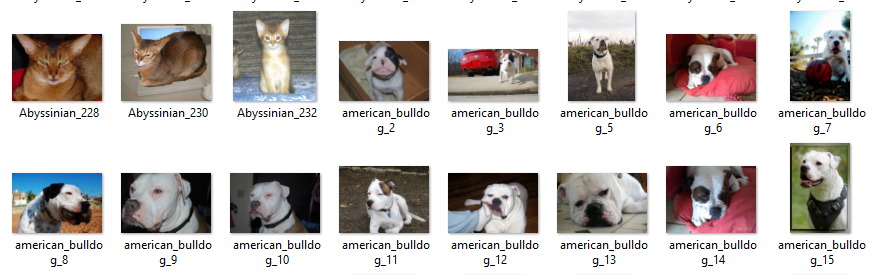

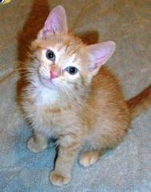

In [6]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [7]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [8]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    print("CUDA is available. You are using a GPU.")
else:
    print("CUDA is not available. You are using a CPU.")


CUDA is available. You are using a GPU.


In [9]:
from pathlib import Path

current_directory = Path.cwd()
current_directory

Path('C:/Users/elvis/AppData/Roaming/Python/Python312/Scripts')

In [10]:
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/cat_example.jpg'])

In [11]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


 # what is machine learning 

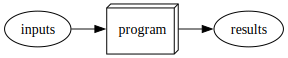

In [12]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

it is a way to get computers to do a specific task.  
Normally we have the inputs e.g. a=2, b=3  and in the program we write clear steps that we want the computer to execute,
e.g. return a + b, then we get the results.  
In ML we ask the computer to figure out/learn by itself how to complete the task.   
Recognizing images - hard to give specific instructions to the computer, since we have no idea how we are able to recognize objects/images ourselves, we simply know how to.   

Why ML instead of the normal way we program?  
Having to specify every single step of complicated tasks is well, complicated.  

Arthur Samuel(1949) idea was:  
*instead of telling the computer the exact steps required to solve a problem, show it examples of the problem to solve, and let it figure out how to solve it itself. 

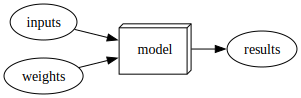

In [13]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

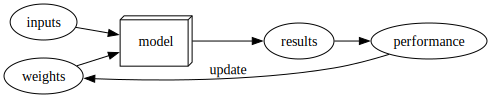

In [14]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

inputs are varibales that the Model processes to produce a result, e.g pixels of images and whether they are a dog or cat.   

Model can do many different things depending on the weights.For instance, in Samuel's checkers program, different values of the weights would result in different checkers-playing strategies.
Next, Samuel said we need an automatic means of testing the effectiveness of any current weight assignment in terms of actual performance. In the case of his checkers program, the "actual performance" of a model would be how well it plays. And you could automatically test the performance of two models by setting them to play against each other, and seeing which one usually wins.  
Each weight assignment has a performance.   
Finally, he says we need a mechanism for altering the weight assignment so as to maximize the performance. For instance, we could look at the difference in weights between the winning model and the losing model, and adjust the weights a little further in the winning direction. 

<span style="color:purple">Learning - we can say that the machine is able to learn to solve a task by itself, because of these automated system. Automatically getting the performance of each of the assigned weights, then automatically altering those weights, so that the performance of the system improves.</span>  

Notice the distinction between the model's results (e.g., the moves in a checkers game) and its performance (e.g., whether it wins the game, or how quickly it wins).  

Also note that once the model is trained—that is, once we've chosen our final, best, favorite weight assignment—then we can think of the weights as being part of the model, since we're not varying them any more.

Therefore, actually using a model after it's trained looks like

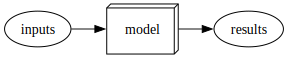

In [15]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

# What is a neural network

What we would like is some kind of function that is so flexible that it could be used to solve any given problem, just by varying its weights. Amazingly enough, this function actually exists! It's the neural network.  
 A mathematical proof called the universal approximation theorem shows that this function can solve any problem to any level of accuracy, in theory. The fact that neural networks are so flexible means that, in practice, they are often a suitable kind of model, and you can focus your effort on the process of training them—that is, of finding good weight assignments.  

Neural networks are special because they are highly flexible, which means they can solve an unusually wide range of problems just by finding the right weights. This is powerful, because stochastic gradient descent provides us a way to find those weight values automatically.


# applying samuel's framework to the image classification model  

inputs - images  
weights - weights of the neural net, resnet34  
Model - neural net, resnet34  
results - values that are calculated by the neural net- dog/cat  
performance - model's accuracy at predicting the correct answers  
weights automaic update function - SGD  



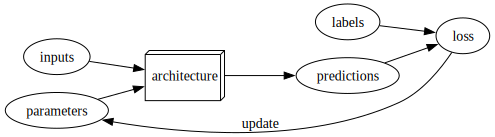

In [16]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

The predictions are calculated from the independent variable, which is the data not including the labels.  
The loss depends not only on the predictions, but also the correct labels (also known as targets or the dependent variable); e.g., "dog" or "cat."

# Limitations inherent to Machine Learning  


**From this picture we can now see some fundamental things about training a deep learning model:
**
* A model cannot be created without data.
* A model can only learn to operate on the patterns seen in the input data used to train it.
* This learning approach only creates predictions, not recommended actions.
* It's not enough to just have examples of input data; we need labels for that data too (e.g., <span style="color:purple">
pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).</span>



 # How Our Image Recognizer Works

A classification model is one which attempts to predict a class, or category. That is, it's predicting from a number of discrete possibilities, such as "dog" or "cat." A regression model is one which attempts to predict one or more numeric quantities, such as a temperature or a location.


# overfitting

it is very easy to create a model that does a great job at making predictions on the exact data it has been trained on, but it is much harder to make accurate predictions on data the model has never seen before  


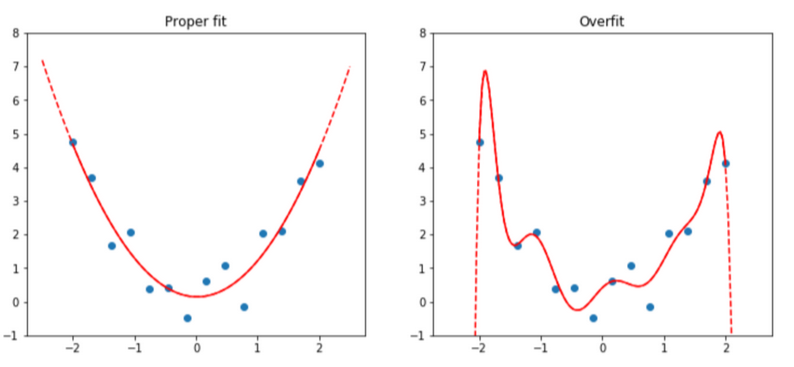  

function x**2. As you can see, although the predictions in the overfit model are accurate for data near the observed data points, they are way off when outside of that range.  

Validation Set: When you train a model, you must always have both a training set and a validation set, and must measure the accuracy of your model only on the validation set. If you train for too long, with not enough data, you will see the accuracy of your model start to get worse; this is called overfitting.